In [140]:
import pandas
import matplotlib.pyplot as plt
dataframe = pandas.read_csv('CBD poi.csv', usecols=[0,1], engine='python')
dataframe.head()

,date,poi-1
0,2017_08_01,35
1,2017_08_13,40
2,2017_08_17,21
3,2017_08_21,23
4,2017_08_29,39


In [141]:
dataframe = dataframe.sort_values(by=['poi-1'])
dataframe.head()

,date,poi-1
62,2017_10_25,18
20,2017_09_08,18
18,2017_09_04,18
70,2017_09_06,20
72,2017_09_20,20


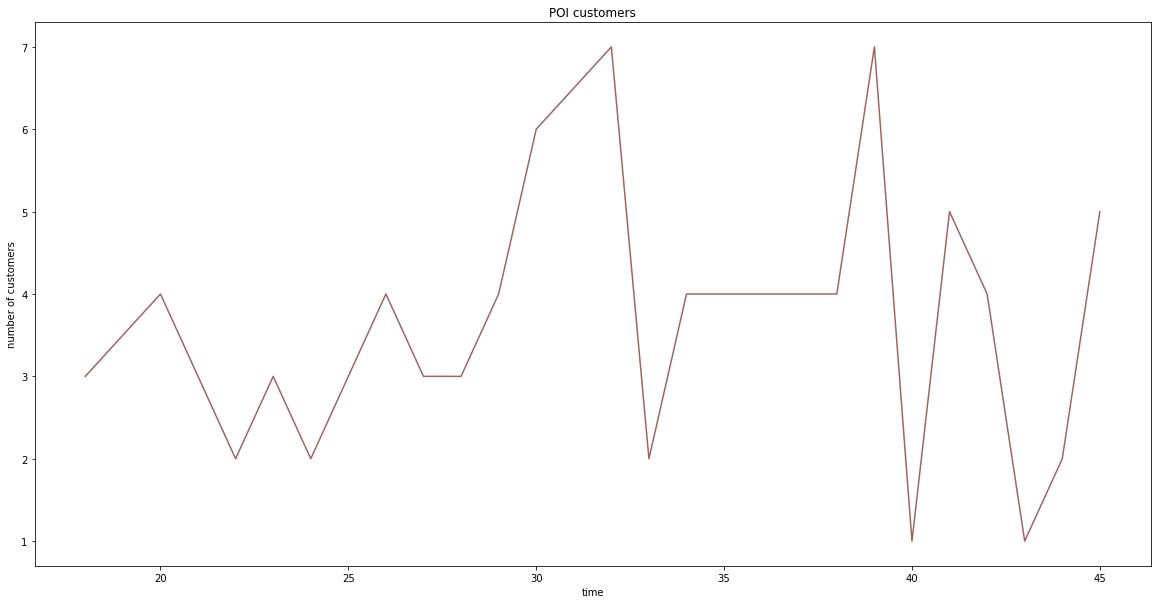

In [143]:
date_grouped = dataframe.groupby('poi-1')['date'].count().plot(kind='line', figsize=(20,10), color='#A26360')
plt.xlabel('time')
plt.ylabel('number of customers')
plt.title('POI customers')
plt.show()

In [144]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

dataframe = dataframe[['poi-1']]
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
43/43 - 2s - loss: 0.0952 - 2s/epoch - 43ms/step
Epoch 2/100
43/43 - 0s - loss: 0.0632 - 95ms/epoch - 2ms/step
Epoch 3/100
43/43 - 0s - loss: 0.0410 - 86ms/epoch - 2ms/step
Epoch 4/100
43/43 - 0s - loss: 0.0280 - 82ms/epoch - 2ms/step
Epoch 5/100
43/43 - 0s - loss: 0.0204 - 82ms/epoch - 2ms/step
Epoch 6/100
43/43 - 0s - loss: 0.0170 - 84ms/epoch - 2ms/step
Epoch 7/100
43/43 - 0s - loss: 0.0153 - 81ms/epoch - 2ms/step
Epoch 8/100
43/43 - 0s - loss: 0.0143 - 81ms/epoch - 2ms/step
Epoch 9/100
43/43 - 0s - loss: 0.0136 - 91ms/epoch - 2ms/step
Epoch 10/100
43/43 - 0s - loss: 0.0132 - 91ms/epoch - 2ms/step
Epoch 11/100
43/43 - 0s - loss: 0.0124 - 95ms/epoch - 2ms/step
Epoch 12/100
43/43 - 0s - loss: 0.0118 - 92ms/epoch - 2ms/step
Epoch 13/100
43/43 - 0s - loss: 0.0110 - 91ms/epoch - 2ms/step
Epoch 14/100
43/43 - 0s - loss: 0.0104 - 85ms/epoch - 2ms/step
Epoch 15/100
43/43 - 0s - loss: 0.0098 - 81ms/epoch - 2ms/step
Epoch 16/100
43/43 - 0s - loss: 0.0092 - 87ms/epoch - 2ms/step
Ep

Train Score: 0.61 RMSE
Test Score: 0.48 RMSE


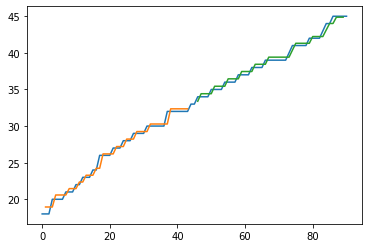

In [145]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# rmse = root mean square error
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# poi 2

In [92]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('CBD poi.csv', usecols=[2], engine='python')
dataframe = dataframe.sort_values(by=['poi-2'])
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


Epoch 1/100
56/56 - 2s - loss: 0.1974 - 2s/epoch - 42ms/step
Epoch 2/100
56/56 - 0s - loss: 0.1269 - 136ms/epoch - 2ms/step
Epoch 3/100
56/56 - 0s - loss: 0.0840 - 149ms/epoch - 3ms/step
Epoch 4/100
56/56 - 0s - loss: 0.0567 - 153ms/epoch - 3ms/step
Epoch 5/100
56/56 - 0s - loss: 0.0412 - 124ms/epoch - 2ms/step
Epoch 6/100
56/56 - 0s - loss: 0.0318 - 131ms/epoch - 2ms/step
Epoch 7/100
56/56 - 0s - loss: 0.0267 - 125ms/epoch - 2ms/step
Epoch 8/100
56/56 - 0s - loss: 0.0230 - 130ms/epoch - 2ms/step
Epoch 9/100
56/56 - 0s - loss: 0.0201 - 132ms/epoch - 2ms/step
Epoch 10/100
56/56 - 0s - loss: 0.0174 - 128ms/epoch - 2ms/step
Epoch 11/100
56/56 - 0s - loss: 0.0149 - 127ms/epoch - 2ms/step
Epoch 12/100
56/56 - 0s - loss: 0.0125 - 134ms/epoch - 2ms/step
Epoch 13/100
56/56 - 0s - loss: 0.0105 - 131ms/epoch - 2ms/step
Epoch 14/100
56/56 - 0s - loss: 0.0085 - 130ms/epoch - 2ms/step
Epoch 15/100
56/56 - 0s - loss: 0.0070 - 132ms/epoch - 2ms/step
Epoch 16/100
56/56 - 0s - loss: 0.0055 - 133ms/epoc

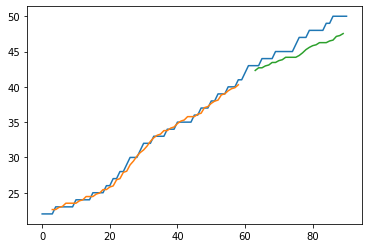

In [93]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# function 

In [ ]:
import pandas
import matplotlib.pyplot as plt

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

dataframe = pandas.read_csv('CBD poi.csv', usecols=[1], engine='python')
dataframe.head()
dataframe = dataframe.sort_values(by=['poi-1'])
dataframe.head()

# fix random seed for reproducibility
numpy.random.seed(7)

dataframe = dataframe[['poi-1']]
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [186]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
sns.set(rc={'figure.figsize':(15,8)})
df = pd.read_csv('CBD poi.csv',parse_dates=['date'])

In [187]:
df.sort_index(inplace=True)
df = df[['date','poi-1']]
df.head()

,date,poi-1
0,2017_08_01,35
1,2017_08_13,40
2,2017_08_17,21
3,2017_08_21,23
4,2017_08_29,39


In [188]:
df[['date']] = df[['date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[5:7],s[8:], s[0:4]))

print(df)

          date  poi-1
0   08/01/2017     35
1   08/13/2017     40
2   08/17/2017     21
3   08/21/2017     23
4   08/29/2017     39
..         ...    ...
86  09/05/2017     34
87  09/23/2017     41
88  09/25/2017     36
89  10/17/2017     30
90  10/29/2017     41

[91 rows x 2 columns]


In [189]:
f = Forecaster(y=df['poi-1'],
                   current_dates=df['date'].apply(str))
f

Forecaster(
    DateStartActuals=2017-08-01T00:00:00.000000000
    DateEndActuals=2017-10-29T00:00:00.000000000
    Freq=None
    N_actuals=91
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

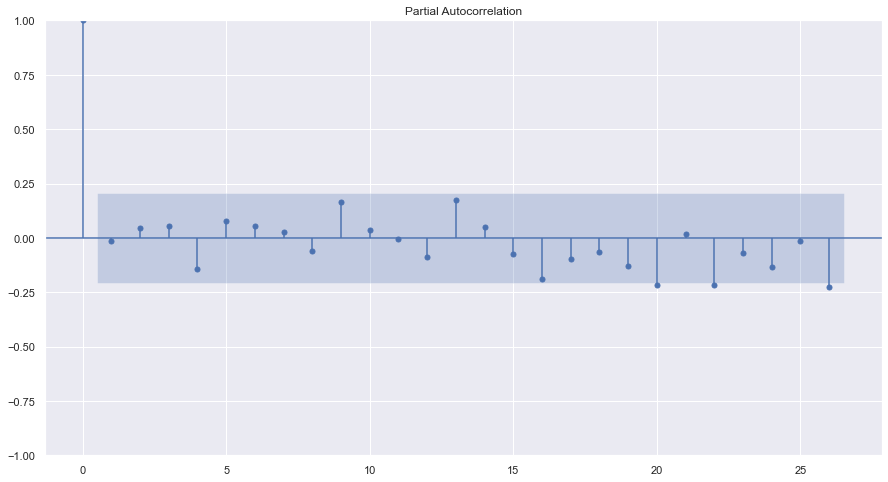

In [190]:
f.plot_pacf(lags=26)
plt.show()

In [198]:

f.seasonal_decompose().plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [200]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

-9.472535220928359
4.0698807406060263e-16


In [201]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

3/3 [==============================] - 3s 4ms/step - loss: 0.5463


<AxesSubplot:xlabel='Date', ylabel='Values'>

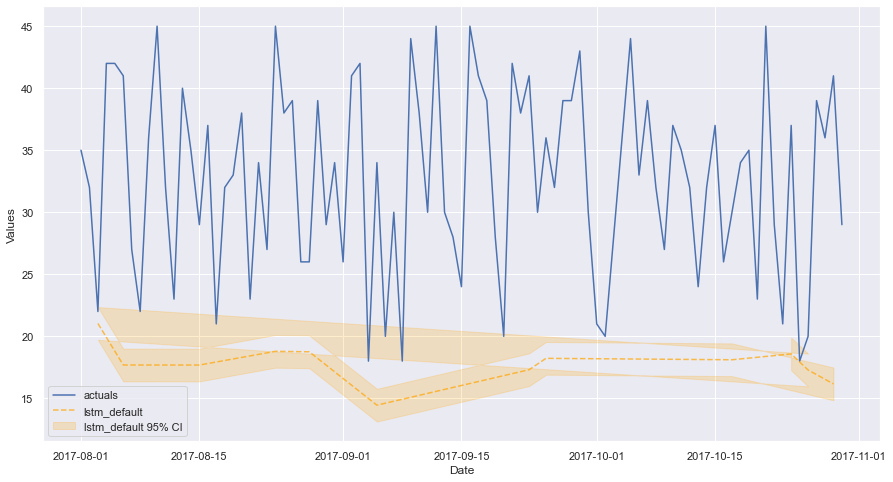

In [202]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

2/2 [==============================] - 2s 10ms/step - loss: 0.5373


<AxesSubplot:xlabel='Date', ylabel='Values'>

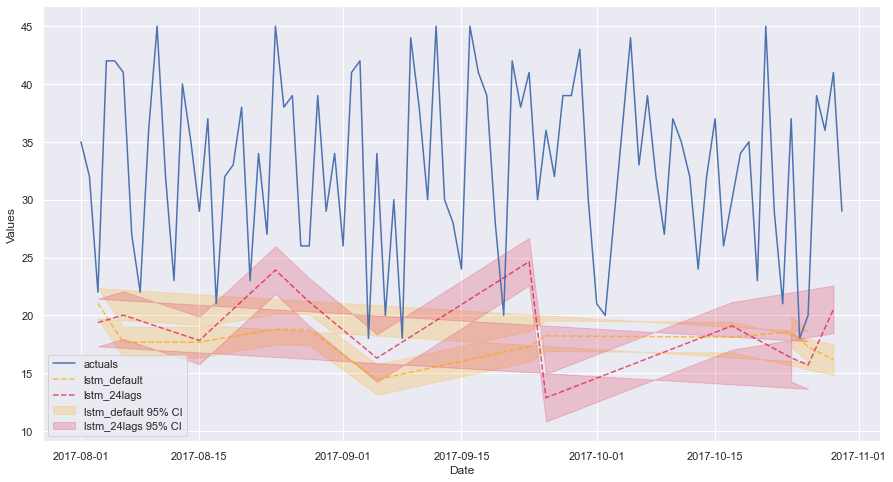

In [203]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
2/2 [==============================] - 3s 612ms/step - loss: 0.5237 - val_loss: 0.6187
Epoch 2/5
2/2 [==============================] - 0s 34ms/step - loss: 0.5175 - val_loss: 0.6123
Epoch 3/5
2/2 [==============================] - 0s 40ms/step - loss: 0.5114 - val_loss: 0.6059
Epoch 4/5
2/2 [==============================] - 0s 41ms/step - loss: 0.5055 - val_loss: 0.5993
Epoch 5/5
2/2 [==============================] - 0s 43ms/step - loss: 0.4996 - val_loss: 0.5930
Epoch 1/5
2/2 [==============================] - 3s 620ms/step - loss: 0.6029 - val_loss: 0.7169
Epoch 2/5
2/2 [==============================] - 0s 34ms/step - loss: 0.5962 - val_loss: 0.7110
Epoch 3/5
2/2 [==============================] - 0s 37ms/step - loss: 0.5898 - val_loss: 0.7052
Epoch 4/5
2/2 [==============================] - 0s 39ms/step - loss: 0.5835 - val_loss: 0.6996
Epoch 5/5
2/2 [==============================] - 0s 38ms/step - loss: 0.5775 - val_loss: 0.6942


<AxesSubplot:xlabel='Date', ylabel='Values'>

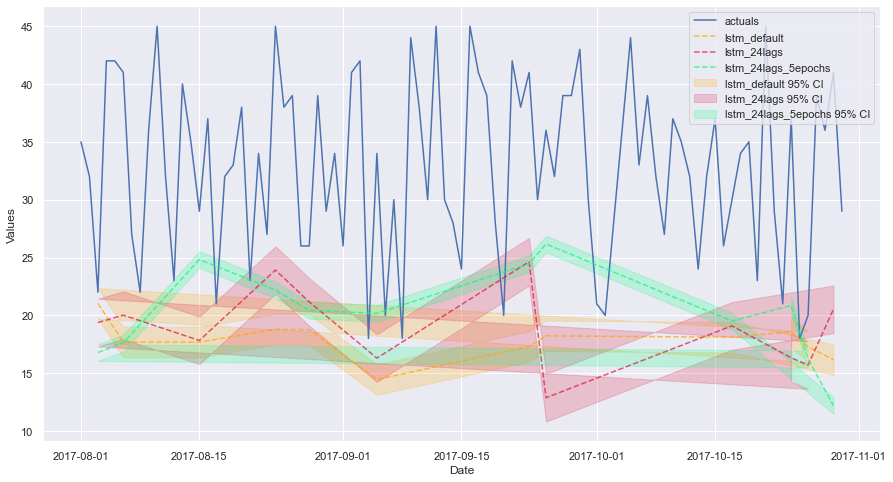

In [204]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
2/2 [==============================] - 7s 1s/step - loss: 0.5514 - val_loss: 0.6422
Epoch 2/25
2/2 [==============================] - 0s 73ms/step - loss: 0.5374 - val_loss: 0.6284
Epoch 3/25
2/2 [==============================] - 0s 67ms/step - loss: 0.5235 - val_loss: 0.6129
Epoch 4/25
2/2 [==============================] - 0s 65ms/step - loss: 0.5090 - val_loss: 0.5947
Epoch 5/25
2/2 [==============================] - 0s 68ms/step - loss: 0.4935 - val_loss: 0.5740
Epoch 6/25
2/2 [==============================] - 0s 55ms/step - loss: 0.4759 - val_loss: 0.5498
Epoch 7/25
2/2 [==============================] - 0s 61ms/step - loss: 0.4556 - val_loss: 0.5207
Epoch 8/25
2/2 [==============================] - 0s 68ms/step - loss: 0.4328 - val_loss: 0.4867
Epoch 9/25
2/2 [==============================] - 0s 67ms/step - loss: 0.4074 - val_loss: 0.4500
Epoch 10/25
2/2 [==============================] - 0s 55ms/step - loss: 0.3833 - val_loss: 0.4128
Epoch 11/25
2/2 [==============

<AxesSubplot:xlabel='Date', ylabel='Values'>

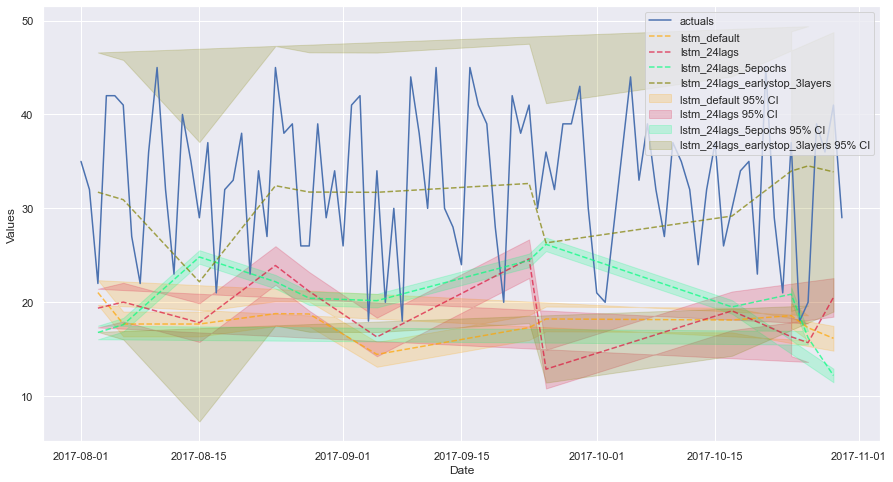

In [205]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.5189 - val_loss: 0.6326
Epoch 2/15
1/1 [==============================] - 0s 111ms/step - loss: 0.4918 - val_loss: 0.6093
Epoch 3/15
1/1 [==============================] - 0s 106ms/step - loss: 0.4675 - val_loss: 0.5792
Epoch 4/15
1/1 [==============================] - 0s 101ms/step - loss: 0.4380 - val_loss: 0.5373
Epoch 5/15
1/1 [==============================] - 0s 132ms/step - loss: 0.3989 - val_loss: 0.4767
Epoch 6/15
1/1 [==============================] - 0s 100ms/step - loss: 0.3447 - val_loss: 0.3885
Epoch 7/15
1/1 [==============================] - 0s 100ms/step - loss: 0.3059 - val_loss: 0.3222
Epoch 8/15
1/1 [==============================] - 0s 99ms/step - loss: 0.3071 - val_loss: 0.2954
Epoch 9/15
1/1 [==============================] - 0s 96ms/step - loss: 0.2822 - val_loss: 0.2952
Epoch 10/15
1/1 [==============================] - 0s 94ms/step - loss: 0.2464 - val_loss: 0.3083
Epoch 11/15
1/1 [======

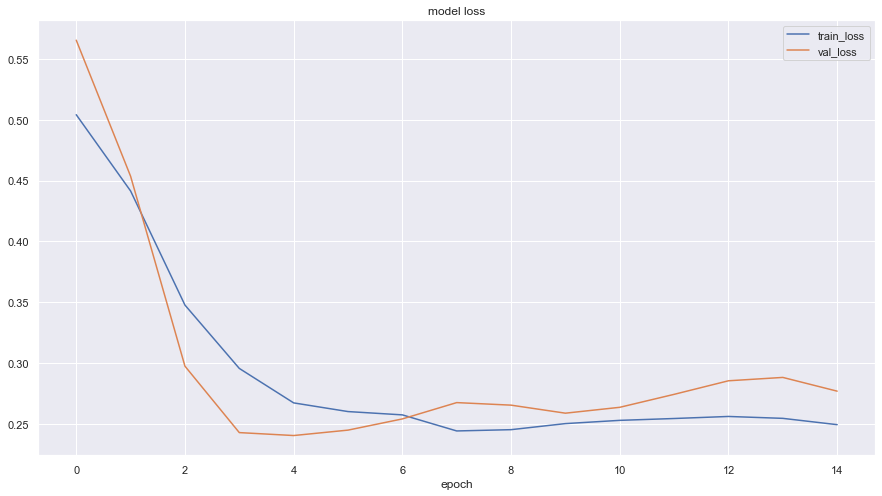

<AxesSubplot:xlabel='Date', ylabel='Values'>

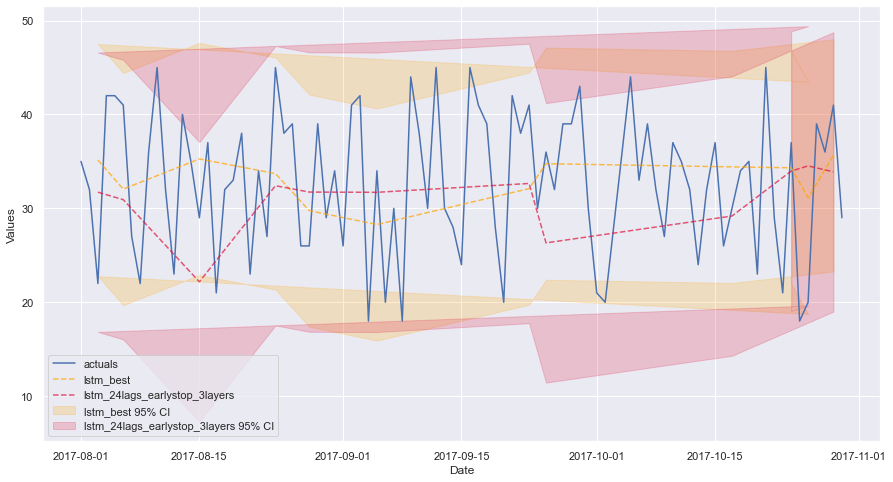

In [206]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [207]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm_best,0.229459,7.779307,-0.004442,True
1,lstm_24lags_earlystop_3layers,0.247632,8.533149,-0.208541,False
2,lstm_24lags_5epochs,0.369461,15.595984,-3.037090,False
3,lstm_24lags,0.405841,16.176019,-3.342964,False
4,lstm_default,0.428867,17.740436,-4.223619,False
